In [11]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf

def load_data(subject='s1', exercise='e1', unit='u1'):
    path = f"fisioterapia_dataset_regresion//{subject}//{exercise}//{unit}//template_session.txt"
    return pd.read_csv(path, delimiter=';')

# 1. Time Series Plots
def plot_time_series(data, sensor_type='acc'):
    plt.figure(figsize=(15, 10))
    
    # x dimension
    plt.subplot(3, 1, 1)
    plt.plot(data['time index'], data[f'{sensor_type}_x'], color='red', label=f'{sensor_type}_x')
    plt.title(f'Time Series {sensor_type} x')
    plt.xlabel('Time Index')
    plt.ylabel('Value')
    plt.legend()
    
    # y dimension
    plt.subplot(3, 1, 2)
    plt.plot(data['time index'], data[f'{sensor_type}_y'], color='green', label=f'{sensor_type}_y')
    plt.title(f'Time Series {sensor_type} y')
    plt.xlabel('Time Index')
    plt.ylabel('Value')
    plt.legend()
    
    # z dimension
    plt.subplot(3, 1, 3)
    plt.plot(data['time index'], data[f'{sensor_type}_z'], color='purple', label=f'{sensor_type}_z')
    plt.title(f'Time Series {sensor_type} z')
    plt.xlabel('Time Index')
    plt.ylabel('Value')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

In [13]:
# 2. Box Plots
def plot_box_plots(data, sensor_type='acc'):
    plt.figure(figsize=(15, 6))
    
    # Create box plots for x, y, z
    plt.boxplot([data[f'{sensor_type}_x'], data[f'{sensor_type}_y'], data[f'{sensor_type}_z']], 
                labels=[f'{sensor_type}_x', f'{sensor_type}_y', f'{sensor_type}_z'])
    
    plt.title(f'Box Plot of {sensor_type} Dimensions')
    plt.ylabel('Value')
    plt.show()

In [14]:

# 3. Seasonal Decomposition
def plot_seasonal_decomposition(data, sensor_type='gyr', column='x'):
    # Set the time index
    data_plot = data.set_index('time index')
    
    # Perform seasonal decomposition
    result = seasonal_decompose(data_plot[f'{sensor_type}_{column}'], model='additive', period=24*7)
    
    # Plot the components
    plt.figure(figsize=(15, 10))
    
    plt.subplot(4, 1, 1)
    plt.plot(result.observed)
    plt.title('Observed')
    
    plt.subplot(4, 1, 2)
    plt.plot(result.trend)
    plt.title('Trend')
    
    plt.subplot(4, 1, 3)
    plt.plot(result.seasonal)
    plt.title('Seasonal')
    
    plt.subplot(4, 1, 4)
    plt.plot(result.resid)
    plt.title('Residual')
    
    plt.tight_layout()
    plt.show()

In [15]:
# 4. Partial Autocorrelation Function (PACF)
def plot_pacf_for_units(data, sensor_type='acc', column='x'):
    plt.figure(figsize=(15, 15))
    
    # Compute the difference to make the series stationary
    diff_data = data[f'{sensor_type}_{column}'].diff().dropna()
    
    # Plot PACF
    plot_pacf(diff_data, lags=30, alpha=0.01)
    plt.title(f'Partial Autocorrelation Function (PACF) for {sensor_type}_{column}')
    plt.show()

In [21]:
# 5. Density graph
def plot_density(data, sensor_type='gyr'):
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 3, 1)
    sns.kdeplot(data[f'{sensor_type}_x'], fill=True)
    plt.title(f'Densidad {sensor_type}_x')
    
    plt.subplot(1, 3, 2)
    sns.kdeplot(data[f'{sensor_type}_y'], fill=True, color='green')
    plt.title(f'Densidad {sensor_type}_y')
    
    plt.subplot(1, 3, 3)
    sns.kdeplot(data[f'{sensor_type}_z'], fill=True, color='purple')
    plt.title(f'Densidad {sensor_type}_z')
    
    plt.tight_layout()
    plt.show()

In [ ]:
# 6. Correlation between dimensions
def plot_correlation_matrix(data, sensor_type='gyr'):
    correlation_columns = [f'{sensor_type}_x', f'{sensor_type}_y', f'{sensor_type}_z']
    correlation_matrix = data[correlation_columns].corr()
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title(f'Matriz de Correlación {sensor_type.upper()}')
    plt.show()

In [23]:
# 7. Rolling Mean and Rolling Std
def plot_rolling_statistics(data, sensor_type='gyr', column='x', window=24):
    plt.figure(figsize=(15, 10))
    
    # Original data
    plt.subplot(3, 1, 1)
    plt.plot(data['time index'], data[f'{sensor_type}_{column}'], label='Original')
    plt.title(f'Serie Original {sensor_type}_{column}')
    
    # Rolling Mean
    plt.subplot(3, 1, 2)
    rolling_mean = data[f'{sensor_type}_{column}'].rolling(window=window).mean()
    plt.plot(data['time index'], rolling_mean, color='red', label=f'Rolling Mean (window={window})')
    plt.title(f'Media Móvil {sensor_type}_{column}')
    
    # Rolling Standard Deviation
    plt.subplot(3, 1, 3)
    rolling_std = data[f'{sensor_type}_{column}'].rolling(window=window).std()
    plt.plot(data['time index'], rolling_std, color='green', label=f'Rolling Std (window={window})')
    plt.title(f'Desviación Estándar Móvil {sensor_type}_{column}')
    
    plt.tight_layout()
    plt.show()

In [24]:
# 8. Scatter plot between dimensions
def plot_scatter_dimensions(data, sensor_type='gyr'):
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 3, 1)
    plt.scatter(data[f'{sensor_type}_x'], data[f'{sensor_type}_y'], alpha=0.5)
    plt.title(f'x vs y ({sensor_type})')
    plt.xlabel(f'{sensor_type}_x')
    plt.ylabel(f'{sensor_type}_y')
    
    plt.subplot(1, 3, 2)
    plt.scatter(data[f'{sensor_type}_x'], data[f'{sensor_type}_z'], alpha=0.5, color='green')
    plt.title(f'x vs z ({sensor_type})')
    plt.xlabel(f'{sensor_type}_x')
    plt.ylabel(f'{sensor_type}_z')
    
    plt.subplot(1, 3, 3)
    plt.scatter(data[f'{sensor_type}_y'], data[f'{sensor_type}_z'], alpha=0.5, color='purple')
    plt.title(f'y vs z ({sensor_type})')
    plt.xlabel(f'{sensor_type}_y')
    plt.ylabel(f'{sensor_type}_z')
    
    plt.tight_layout()
    plt.show()

In [29]:
# 9. Transformations
def plot_transformations(data, sensor_type='gyr', column='x'):
    plt.figure(figsize=(15, 10))
    
    # Original data
    plt.subplot(2, 2, 1)
    plt.plot(data['time index'], data[f'{sensor_type}_{column}'])
    plt.title('Original')
    
    # Log Transformation
    plt.subplot(2, 2, 2)
    plt.plot(data['time index'], np.log(np.abs(data[f'{sensor_type}_{column}'] - data[f'{sensor_type}_{column}'].min()) + 1))
    plt.title('Log Transformation')
    
    # Square Root Transformation
    plt.subplot(2, 2, 3)
    plt.plot(data['time index'], np.sqrt(np.abs(data[f'{sensor_type}_{column}'])))
    plt.title('Square Root Transformation')
    
    # First Difference
    plt.subplot(2, 2, 4)
    plt.plot(data['time index'][1:], data[f'{sensor_type}_{column}'].diff().dropna())
    plt.title('First Difference')
    
    plt.tight_layout()
    plt.show()

In [30]:
# 10. Outliers
def plot_outliers(data, sensor_type='gyr', column='x'):
    from scipy import stats
    
    # Calculate Z-scores
    z_scores = np.abs(stats.zscore(data[f'{sensor_type}_{column}']))
    
    plt.figure(figsize=(15, 6))
    plt.scatter(data['time index'], data[f'{sensor_type}_{column}'], 
                c=z_scores, cmap='viridis', alpha=0.7)
    plt.colorbar(label='Absolute Z-Score')
    plt.title(f'Outliers en {sensor_type}_{column}')
    plt.xlabel('Time Index')
    plt.ylabel('Value')
    plt.show()

In [16]:
data = load_data()  

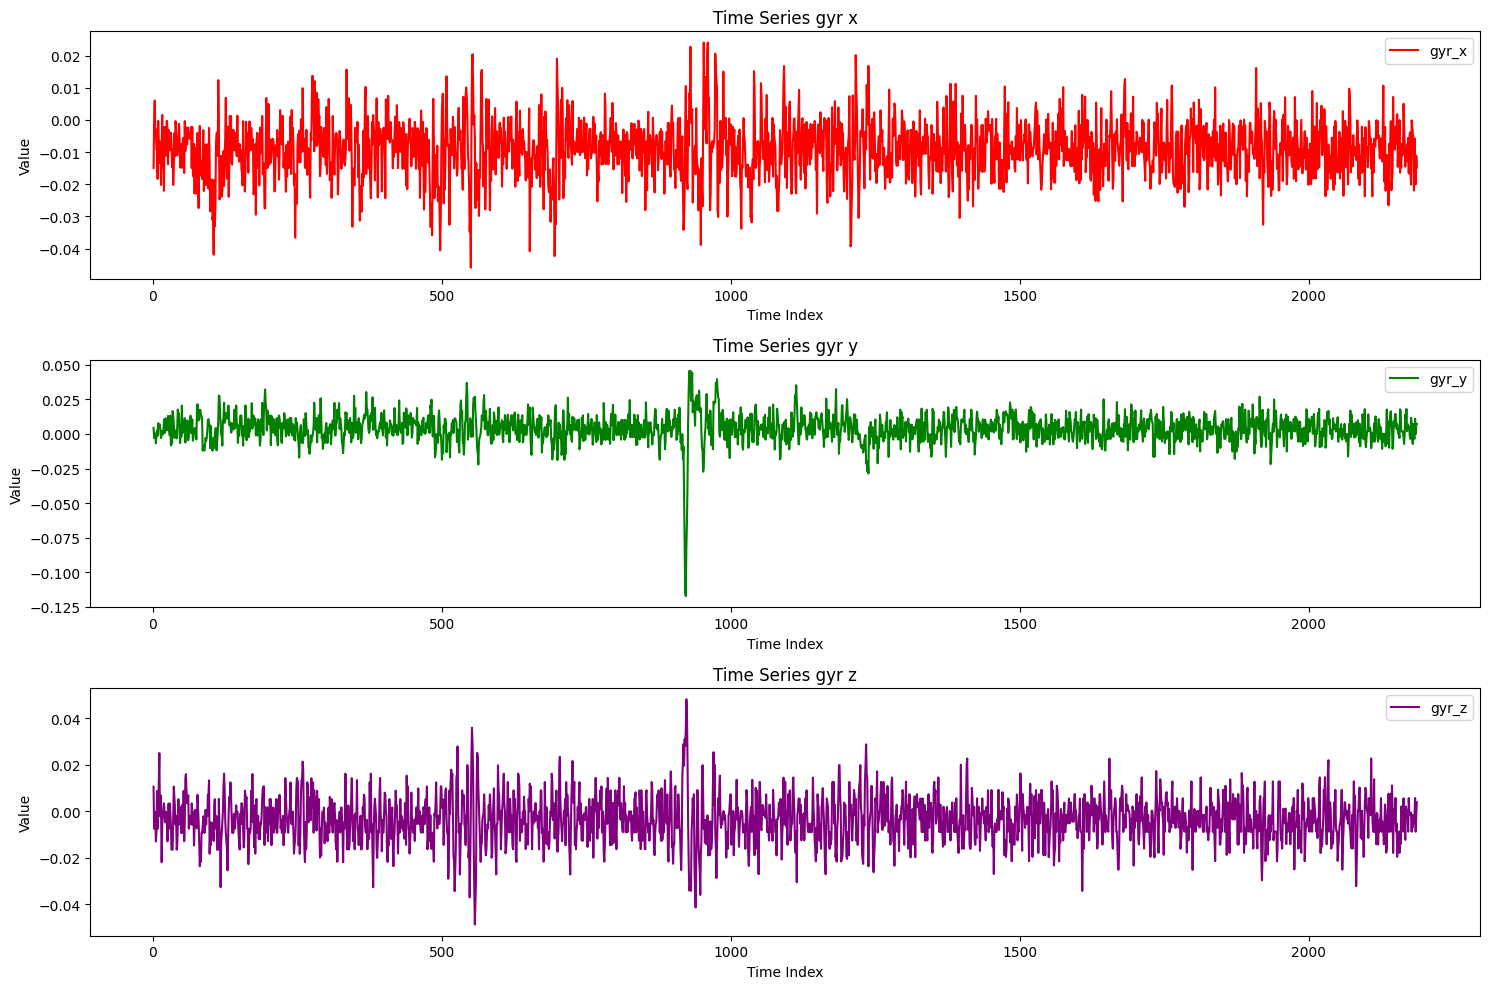

In [17]:
plot_time_series(data, sensor_type='gyr')

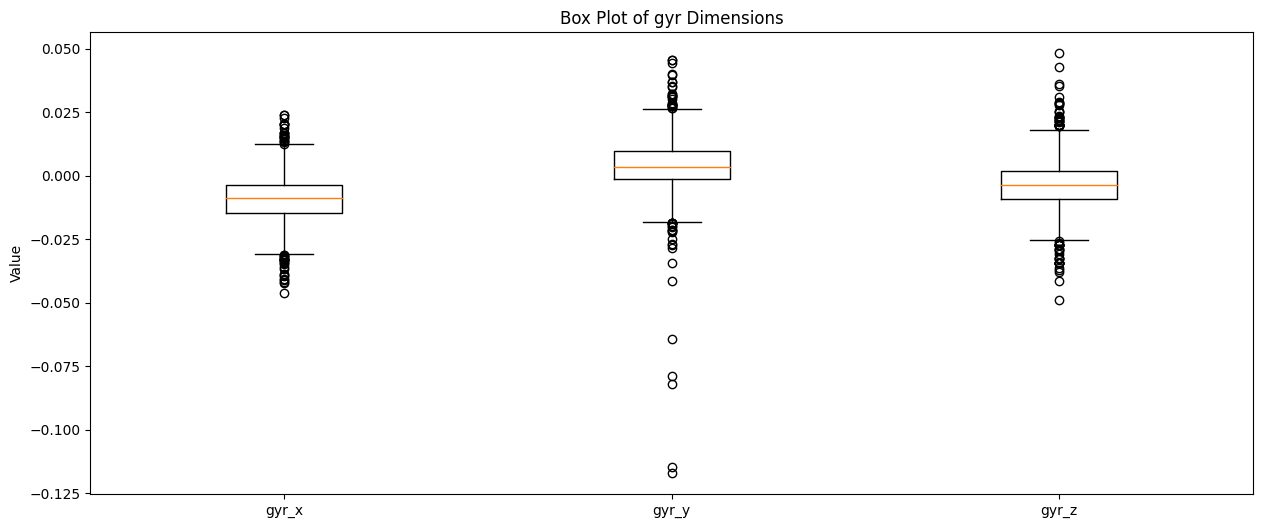

In [18]:
plot_box_plots(data, sensor_type='gyr')

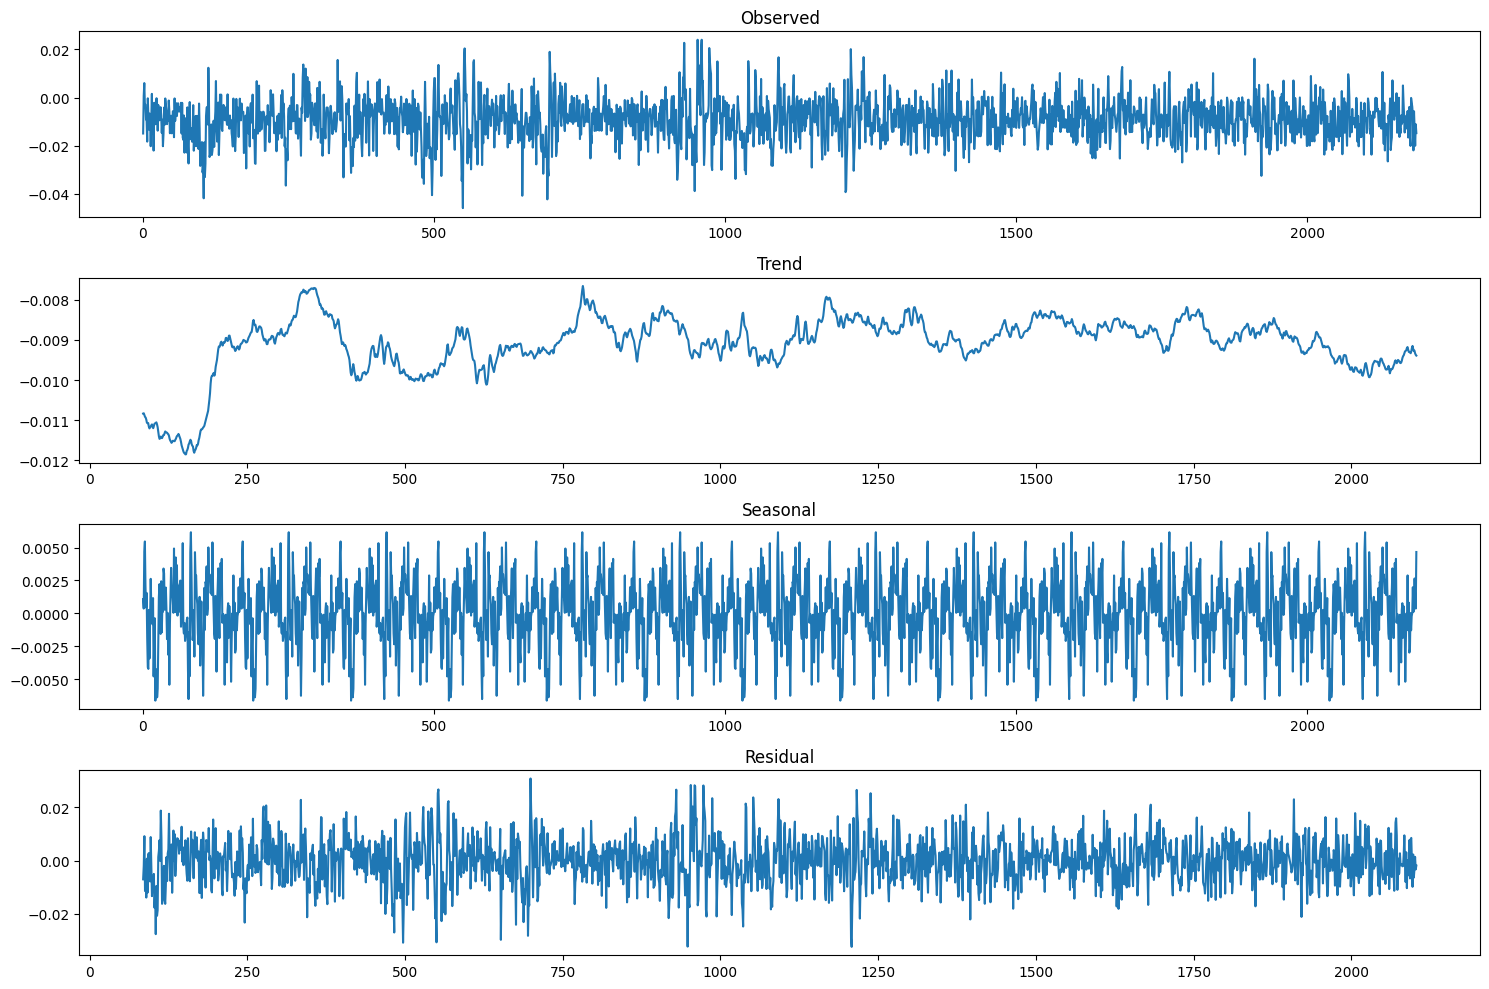

In [19]:
plot_seasonal_decomposition(data, sensor_type='gyr', column='x')

<Figure size 1500x1500 with 0 Axes>

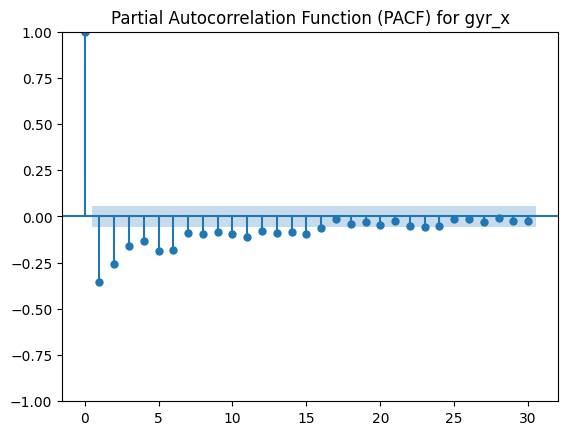

In [20]:
plot_pacf_for_units(data, sensor_type='gyr', column='x')

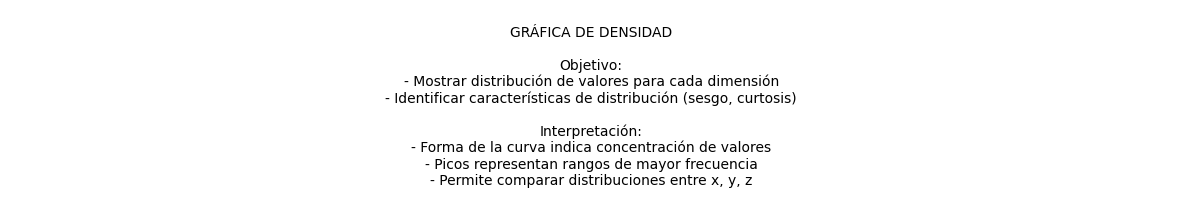

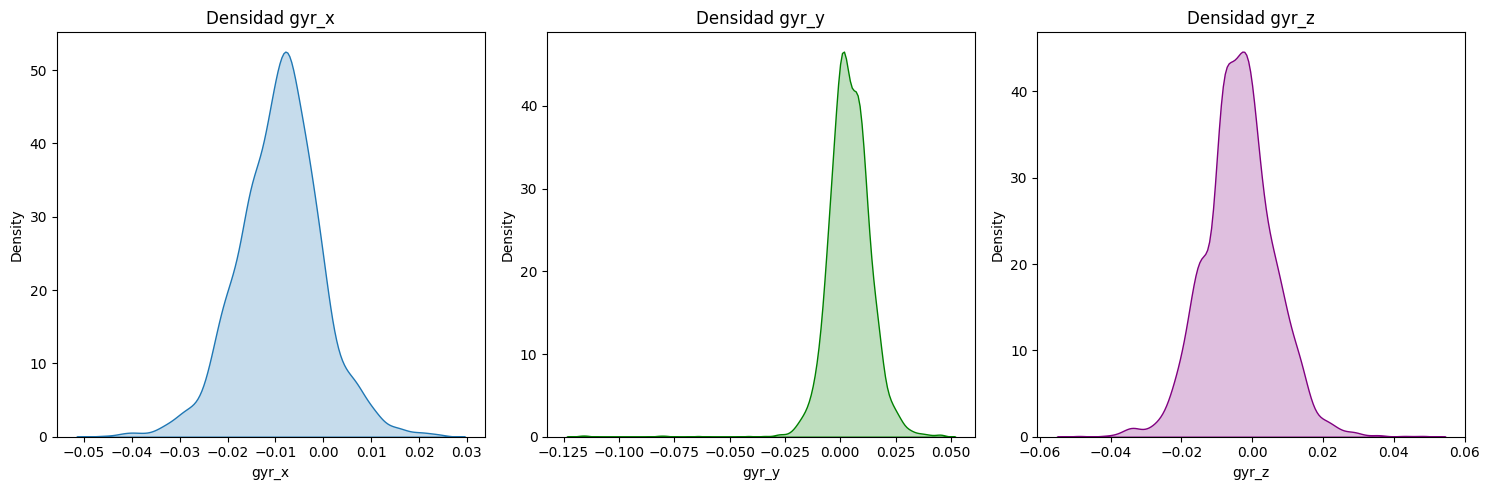

In [ ]:
# Gráfica de Densidad
plt.figure(figsize=(15, 2))
plt.text(0.5, 0.5, 
"""
GRÁFICA DE DENSIDAD

Objetivo:
- Mostrar distribución de valores para cada dimensión
- Identificar características de distribución (sesgo, curtosis)

Interpretación:
- Forma de la curva indica concentración de valores
- Picos representan rangos de mayor frecuencia
- Permite comparar distribuciones entre x, y, z
""", 
horizontalalignment='center', verticalalignment='center', fontsize=10, transform=plt.gca().transAxes)
plt.axis('off')
plt.show()
plot_density(data)

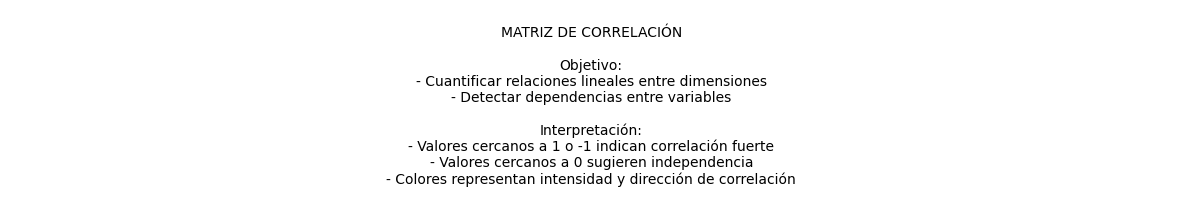

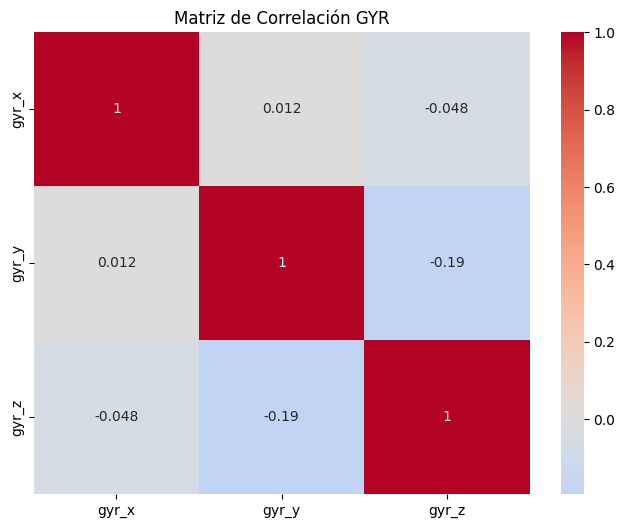

In [ ]:
# Matriz de Correlación
plt.figure(figsize=(15, 2))
plt.text(0.5, 0.5, 
"""
MATRIZ DE CORRELACIÓN

Objetivo:
- Cuantificar relaciones lineales entre dimensiones
- Detectar dependencias entre variables

Interpretación:
- Valores cercanos a 1 o -1 indican correlación fuerte
- Valores cercanos a 0 sugieren independencia
- Colores representan intensidad y dirección de correlación
""", 
horizontalalignment='center', verticalalignment='center', fontsize=10, transform=plt.gca().transAxes)
plt.axis('off')
plt.show()
plot_correlation_matrix(data)

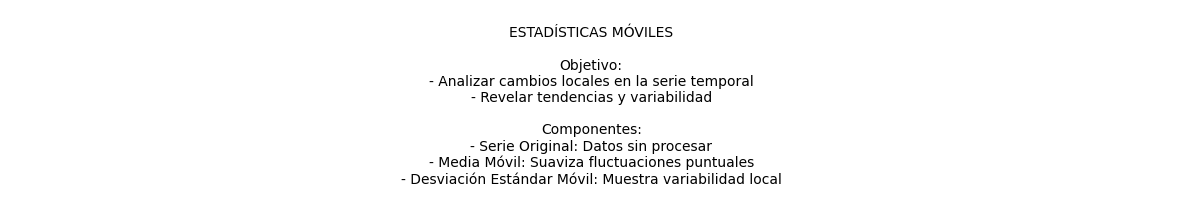

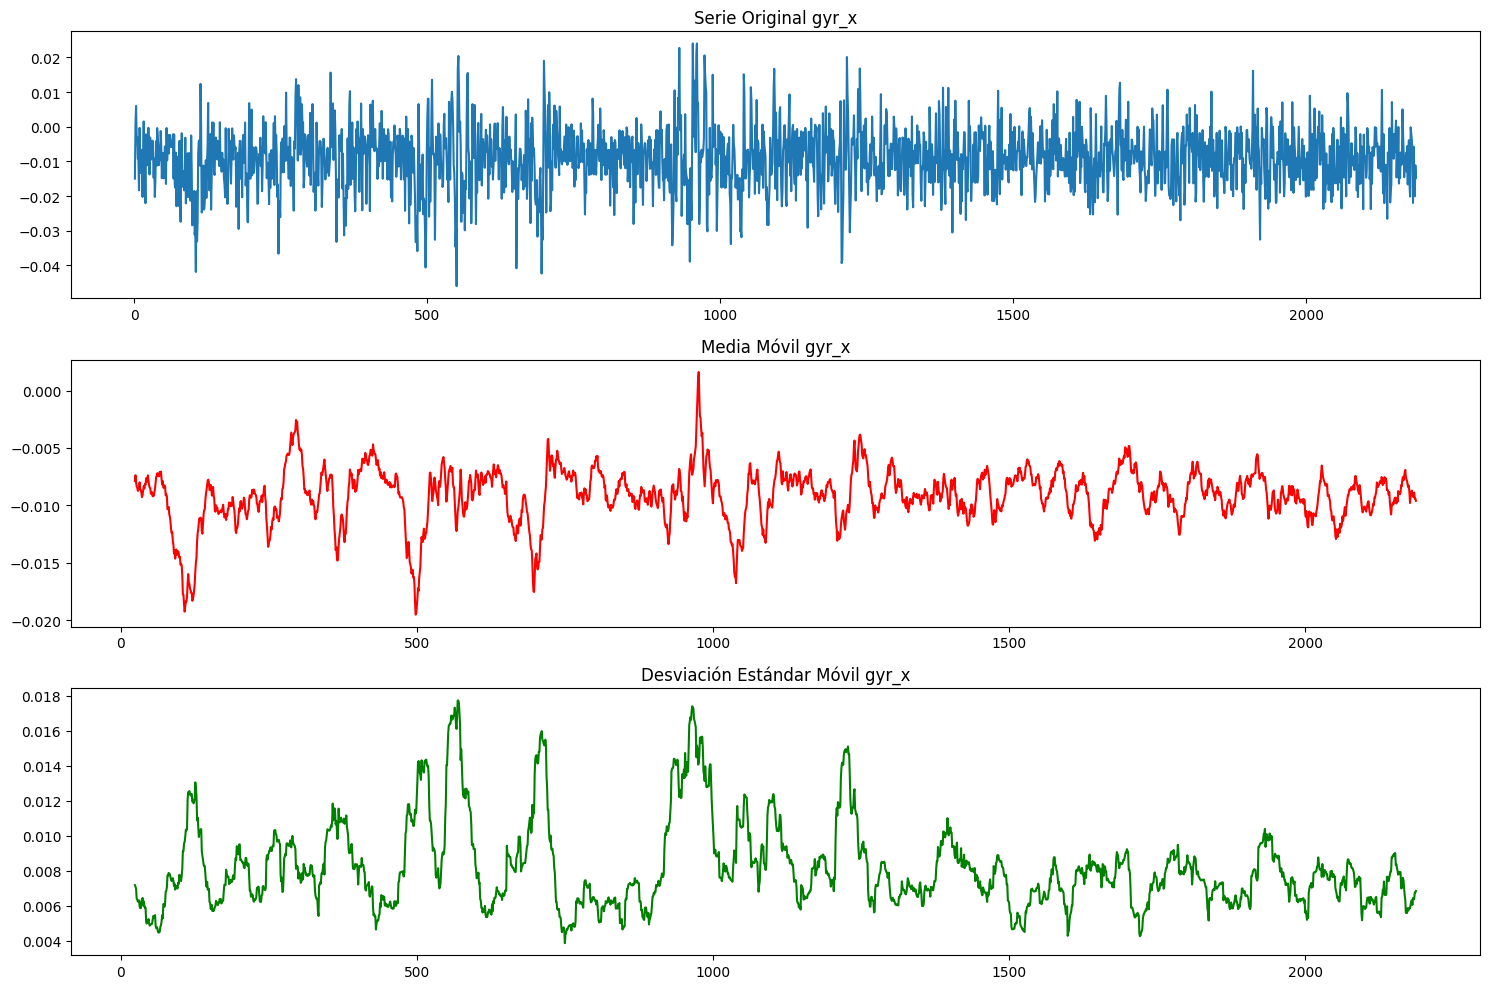

In [ ]:
# Estadísticas Móviles
plt.figure(figsize=(15, 2))
plt.text(0.5, 0.5, 
"""
ESTADÍSTICAS MÓVILES

Objetivo:
- Analizar cambios locales en la serie temporal
- Revelar tendencias y variabilidad

Componentes:
- Serie Original: Datos sin procesar
- Media Móvil: Suaviza fluctuaciones puntuales
- Desviación Estándar Móvil: Muestra variabilidad local
""", 
horizontalalignment='center', verticalalignment='center', fontsize=10, transform=plt.gca().transAxes)
plt.axis('off')
plt.show()
plot_rolling_statistics(data)

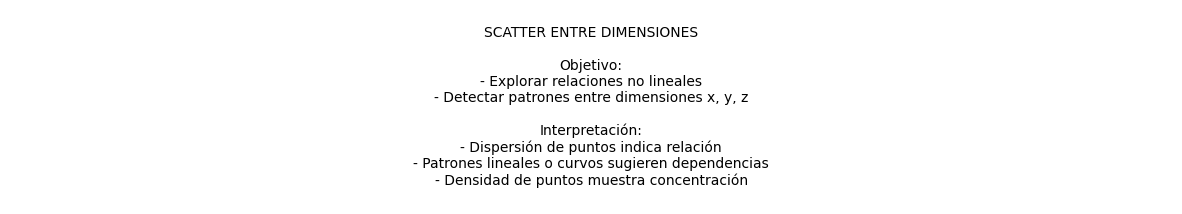

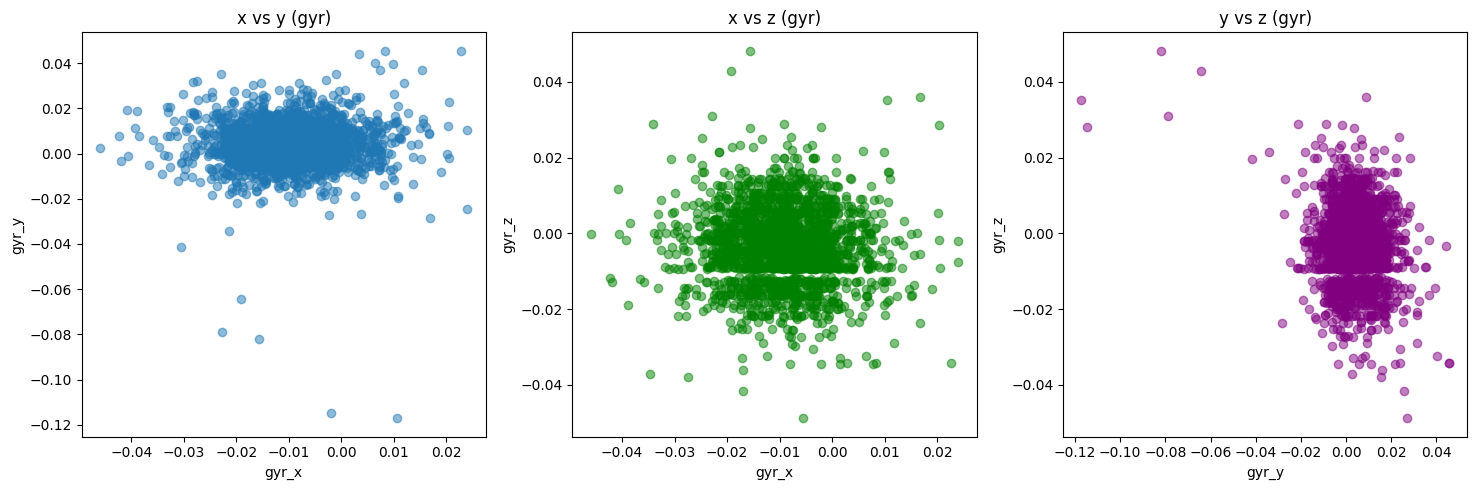

In [ ]:
# Scatter entre Dimensiones
plt.figure(figsize=(15, 2))
plt.text(0.5, 0.5, 
"""
SCATTER ENTRE DIMENSIONES

Objetivo:
- Explorar relaciones no lineales
- Detectar patrones entre dimensiones x, y, z

Interpretación:
- Dispersión de puntos indica relación
- Patrones lineales o curvos sugieren dependencias
- Densidad de puntos muestra concentración
""", 
horizontalalignment='center', verticalalignment='center', fontsize=10, transform=plt.gca().transAxes)
plt.axis('off')
plt.show()
plot_scatter_dimensions(data)


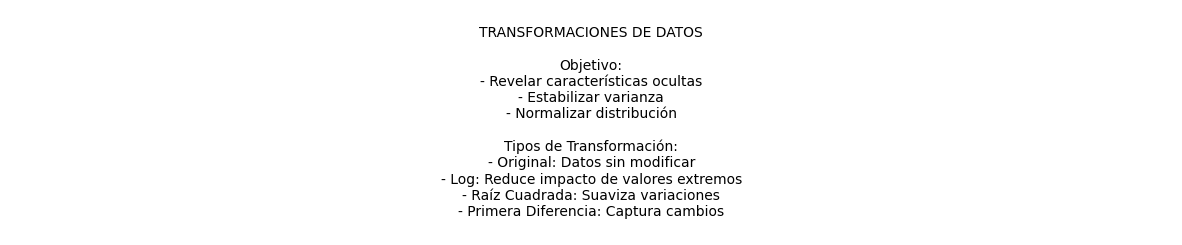

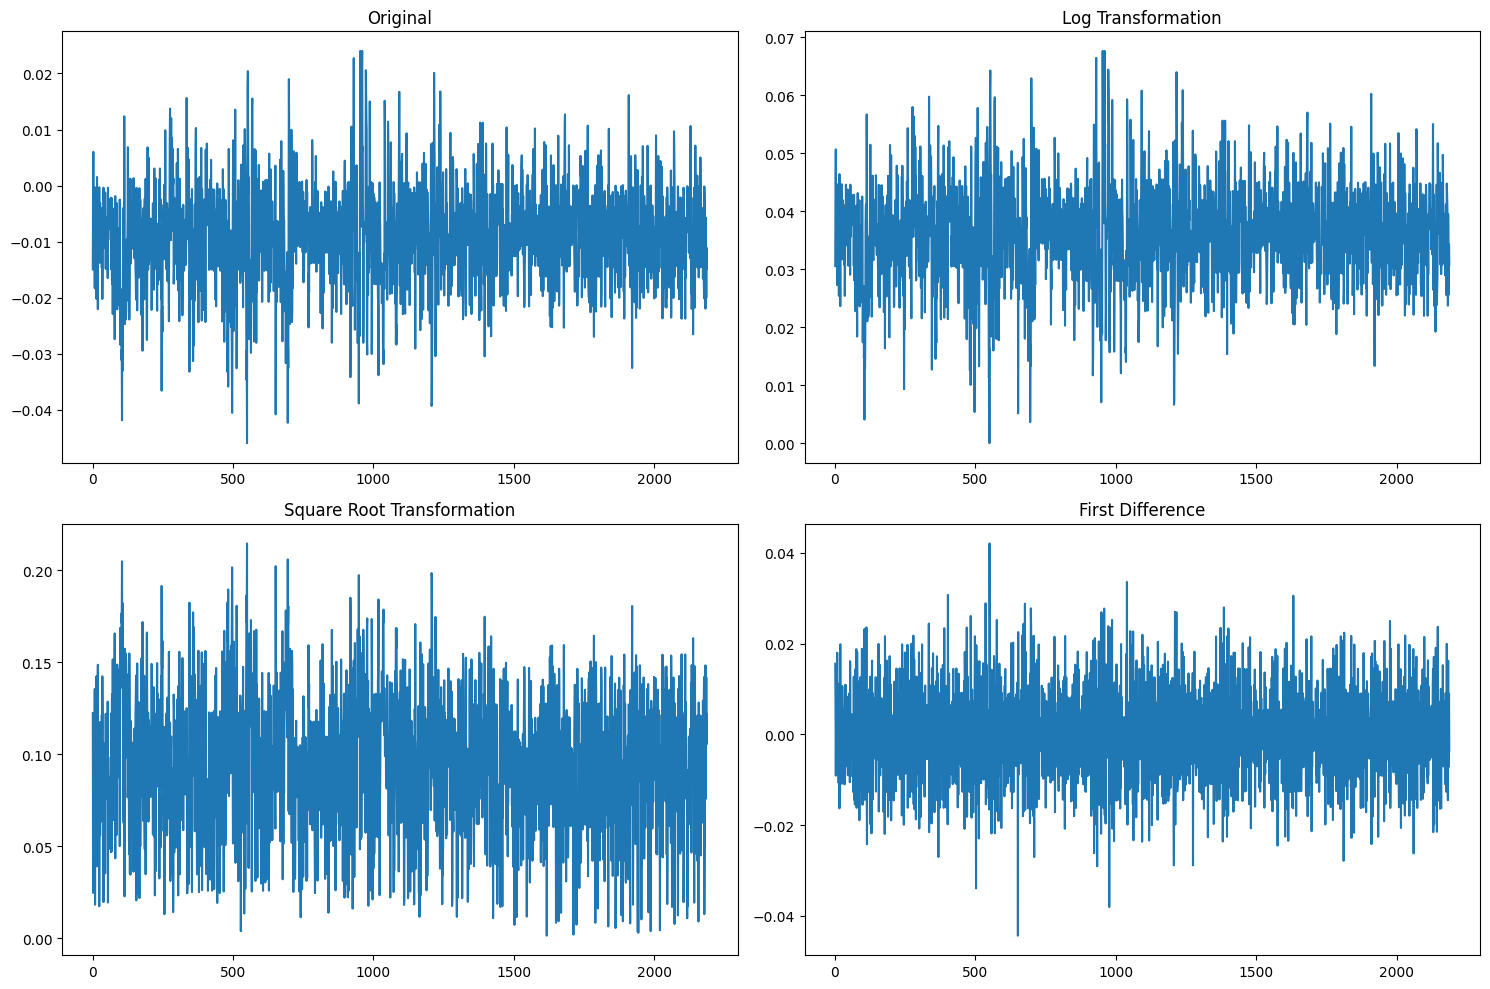

In [ ]:
# Transformaciones
plt.figure(figsize=(15, 2))
plt.text(0.5, 0.5, 
"""
TRANSFORMACIONES DE DATOS

Objetivo:
- Revelar características ocultas
- Estabilizar varianza
- Normalizar distribución

Tipos de Transformación:
- Original: Datos sin modificar
- Log: Reduce impacto de valores extremos
- Raíz Cuadrada: Suaviza variaciones
- Primera Diferencia: Captura cambios
""", 
horizontalalignment='center', verticalalignment='center', fontsize=10, transform=plt.gca().transAxes)
plt.axis('off')
plt.show()
plot_transformations(data)

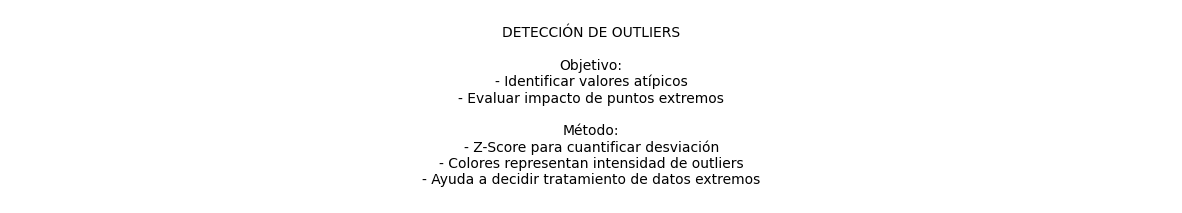

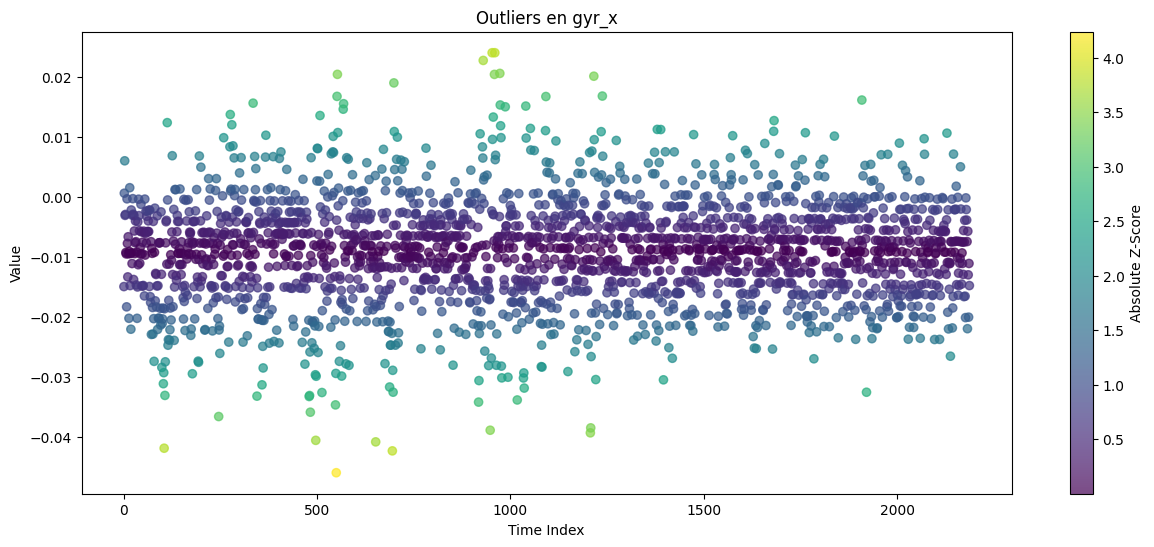

In [ ]:
# Outliers
plt.figure(figsize=(15, 2))
plt.text(0.5, 0.5, 
"""
DETECCIÓN DE OUTLIERS

Objetivo:
- Identificar valores atípicos
- Evaluar impacto de puntos extremos

Método:
- Z-Score para cuantificar desviación
- Colores representan intensidad de outliers
- Ayuda a decidir tratamiento de datos extremos
""", 
horizontalalignment='center', verticalalignment='center', fontsize=10, transform=plt.gca().transAxes)
plt.axis('off')
plt.show()
plot_outliers(data)